# PS-4 Miniproject (House price Prediction)

ROLL no.(3,23,30,50) Branch:AI&DS Year:SE Academic year:2022-2023

In [ ]:
import pandas as pd      #3_AI&DS,23_AI&DS,30_AI&DS,50_AI&DS
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
pwd


'C:\\Users\\admin\\Desktop\\datasets'

In [5]:
warnings.filterwarnings("ignore")# it is used to supress the warnings ie. warnings wil be not shown
sns.set(color_codes=True)
sns.set_palette(palette='magma',n_colors=9)

In [34]:
rabindra=pd.read_csv('C:/Users/admin/Desktop/houseprice.csv')

In [53]:
rabindra.head(5
             )

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222,18.7,396.90,5.33,36.2


In [36]:
rabindra.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
504,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1.0,273,21.0,391.99,9.67,22.4
505,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1.0,273,21.0,396.90,9.08,20.6
506,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1.0,273,21.0,396.90,5.64,23.9
507,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1.0,273,21.0,393.45,6.48,22.0
508,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1.0,273,21.0,396.90,7.88,11.9


In [38]:
rabindra.shape

(509, 14)

In [43]:
c1=rabindra.columns
c1

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [48]:
rabindra.duplicated().sum() #gives total no. of duplicates ka sum


4

In [50]:
rabindra=rabindra.drop_duplicates()#ie all duplicated values are removed
rabindra.duplicated().sum()


0

In [66]:
rabindra.isna().sum().head()#ie. indus has 3 null values nox has 2 and so on.....#rabindra_23_AI&DS


CRIM     0
ZN       0
INDUS    0
CHAS     0
NOX      2
dtype: int64

In [61]:
rabindra.dropna().shape 

(497, 14)

In [63]:
#setting some values of indus
rabindra["INDUS"]=rabindra["INDUS"].fillna(rabindra["INDUS"].median())

In [71]:
from sklearn.impute import SimpleImputer #used to impute missing values stratigically rollno.(3,23,30,50)


# here we will use median as our strategy!!

In [74]:
imputer =SimpleImputer(strategy='median') # should not be capital in Median 
rab1=imputer.fit_transform(rabindra)
rabindra=pd.DataFrame(rab1)              #Framing the Data   
rabindra.columns=c1

In [76]:
#now all missing values are replaced with the median values roll No.(3,23,30,50)
rabindra.isna().sum(
)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Now no null values are there   roll No.(3,23,30,50)

In [81]:
rabindra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       505 non-null    float64
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    float64
 4   NOX      505 non-null    float64
 5   RM       505 non-null    float64
 6   AGE      505 non-null    float64
 7   DIS      505 non-null    float64
 8   RAD      505 non-null    float64
 9   TAX      505 non-null    float64
 10  PTRATIO  505 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MEDV     505 non-null    float64
dtypes: float64(14)
memory usage: 55.4 KB


In [83]:
#statistical summary of our analysis
rabindra.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [88]:
rabindra.describe().T.head(3)

,count,mean,std,min,25%,50%,75%,max
CRIM,505.0,3.606091,8.608447,0.00632,0.08199,0.25387,3.67367,88.9762
ZN,505.0,11.386139,23.340080,0.00000,0.00000,0.00000,12.50000,100.0000
INDUS,505.0,11.151307,6.843323,0.46000,5.19000,9.69000,18.10000,27.7400


Data Visualization through Histogram

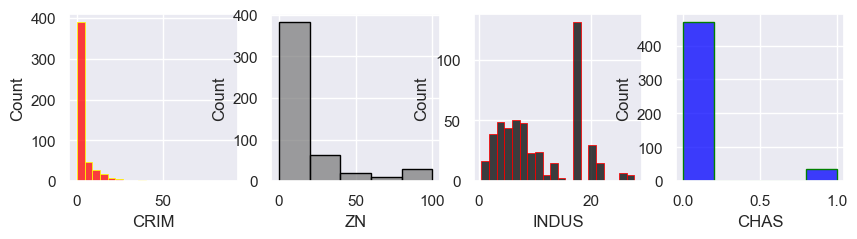

In [96]:
plt.figure(figsize=(10,10))
plt.subplot(4,4,1) # 4 rows,4 colums, 1 plot         #RABINDRA MISHRA
sns.histplot(rabindra['CRIM'], edgecolor="yellow",color="red",bins=20)
plt.subplot(4,4,2)  #4 rows, 4 columns, 2 plot ie. second figure
sns.histplot(rabindra['ZN'],edgecolor="black",color="grey",bins=5)
plt.subplot(4,4,3)  #4 rows,4 columns, 3 plot ie. second diagram
sns.histplot(rabindra['INDUS'],edgecolor="red",color="black",bins=20)
plt.subplot(4,4,4)
sns.histplot(rabindra['CHAS'],edgecolor="green",color="blue",bins=5)
plt.show()


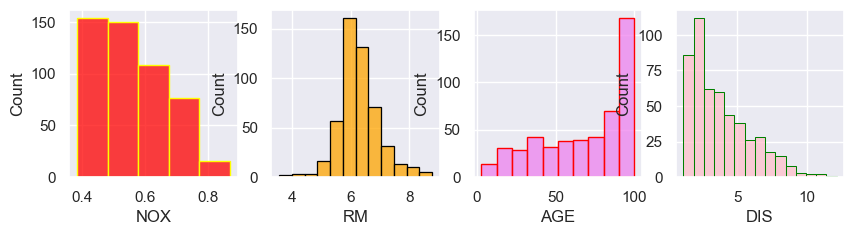

In [104]:
plt.figure(figsize=(10,10))
plt.subplot(4,4,1)
sns.histplot(rabindra['NOX'],edgecolor="yellow",color="red",bins=5)
plt.subplot(4,4,2)
sns.histplot(rabindra['RM'],edgecolor="black",color="orange",bins=12)
plt.subplot(4,4,3)
sns.histplot(rabindra['AGE'],edgecolor="red",color="violet",bins=10)
plt.subplot(4,4,4)
sns.histplot(rabindra['DIS'],edgecolor="green",color="pink",bins=15)
plt.show()


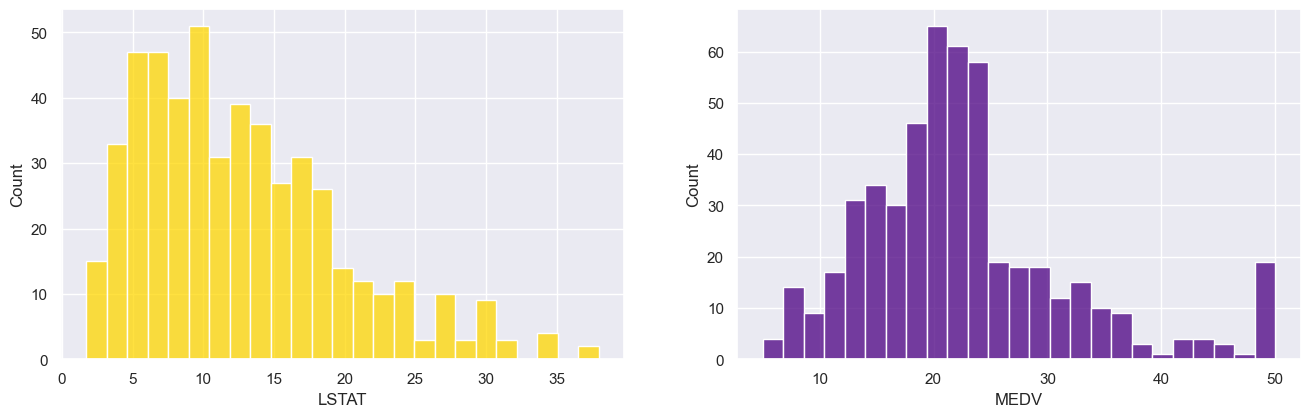

In [110]:
plt.figure(figsize=(16,10))  #rabindra Mishra
plt.subplot(2,2,1)
sns.histplot(rabindra["LSTAT"],color="gold",bins=25)
plt.subplot(2,2,2)
sns.histplot(rabindra["MEDV"],color="indigo",bins=25)
plt.show()

# Finding Co relation Matrix in Python    roll No.(3,23,30,50)

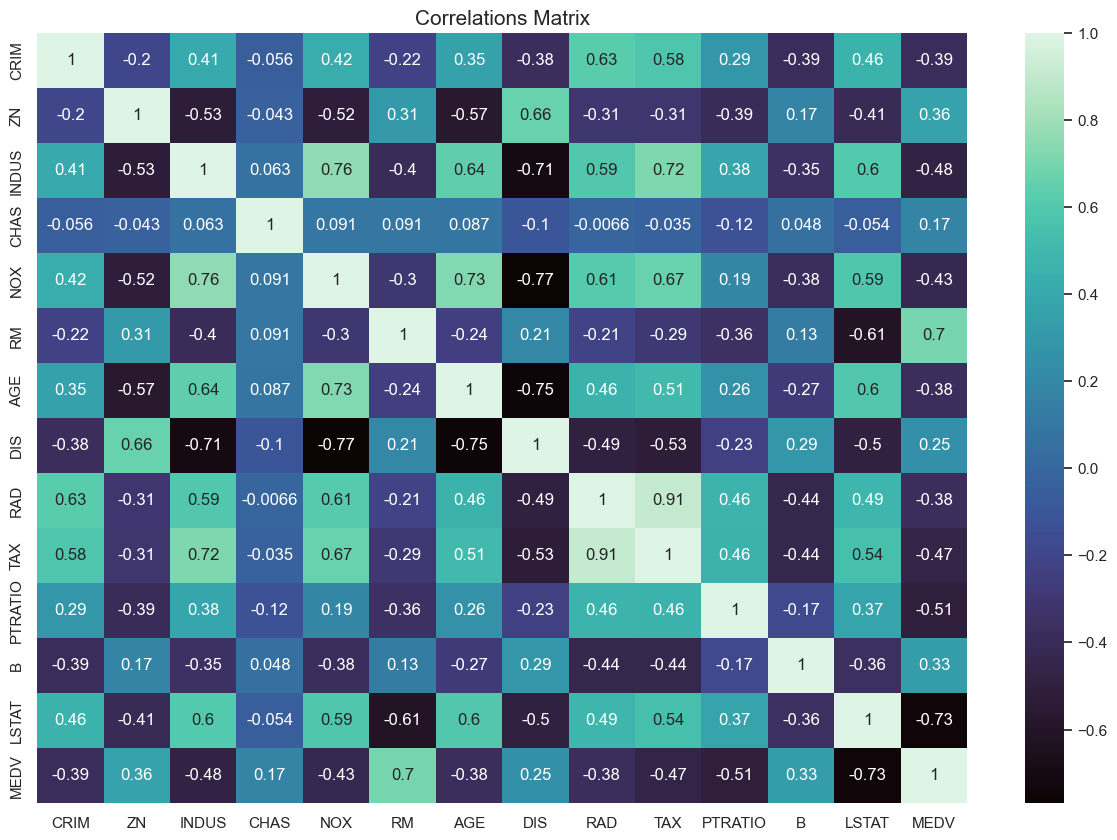

In [111]:
plt.figure(figsize=(15,10))   #rabindra Mishra
sns.heatmap(rabindra.corr(),annot=True,cmap="mako")
plt.title("Correlations Matrix",size=15)
plt.show()

In [114]:
#plotting using scatter Matrix
from pandas.plotting import scatter_matrix

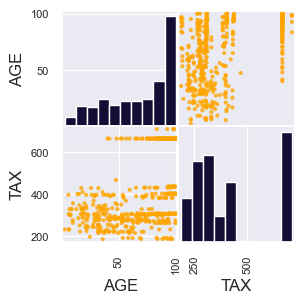

In [122]:
AIDS_23=['AGE','TAX']
scatter_matrix(rabindra[AIDS_23],color="orange",alpha=0.8,figsize=(3,3))

plt.show()